# Orthogonal polynomials

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

## Mini-Introduction to `sympy`

In [2]:
import sympy as sym

# Enable "pretty-printing" in IPython
sym.init_printing()

Make a new `Symbol` and work with it:

In [3]:
x = sym.Symbol("x")

myexpr = (x**2-3)**2
myexpr

In [4]:
myexpr = (x**2-3)**2
myexpr
myexpr.expand()

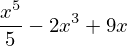

In [5]:
sym.integrate(myexpr, x)

In [6]:
sym.integrate(myexpr, (x, -1, 1))

## Orthogonal polynomials

Now write a function `inner_product(f, g)`:

In [7]:
def inner_product(f, g):
    return sym.integrate(f*g, (x, -1, 1))

Show that it works:

In [8]:
inner_product(1, 1)

In [9]:
inner_product(1, x)

Next, define a `basis` consisting of a few monomials:

In [10]:
basis = [1, x, x**2, x**3]
#basis = [1, x, x**2, x**3, x**4, x**5]

And run Gram-Schmidt on it:

In [11]:
orth_basis = []

for q in basis:
    for prev_q in orth_basis:
        q = q - inner_product(prev_q, q)*prev_q / inner_product(prev_q,prev_q)
    orth_basis.append(q)

legendre_basis = [orth_basis[0],]

#to compute Legendre polynomials need to normalize so that q(1)=1 rather than ||q||=1
for q in orth_basis[1:]:
    q = q / q.subs(x,1)
    legendre_basis.append(q)

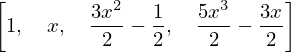

In [12]:
legendre_basis

These are called the *Legendre polynomials*.

--------------------
What do they look like?

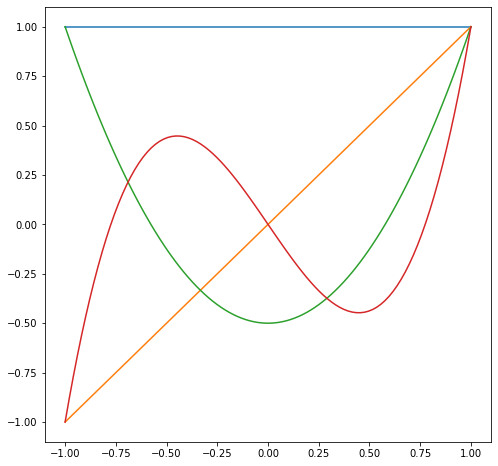

In [13]:
mesh = np.linspace(-1, 1, 100)

pt.figure(figsize=(8,8))
for f in legendre_basis:
    f = sym.lambdify(x, f)
    pt.plot(mesh, [f(xi) for xi in mesh])

-----
These functions are important enough to be included in `scipy.special` as `eval_legendre`:

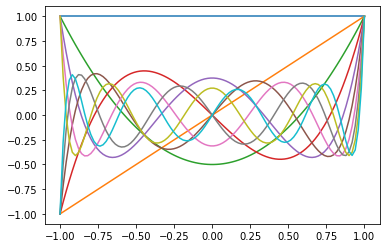

In [14]:
import scipy.special as sps

for i in range(10):
    pt.plot(mesh, sps.eval_legendre(i, mesh))

What can we find out about the conditioning of the generalized Vandermonde matrix for Legendre polynomials?

In [15]:
#keep
n = 20
xs = np.linspace(-1, 1, n)
V = np.array([
    sps.eval_legendre(i, xs)
    for i in range(n)
]).T

la.cond(V)

The Chebyshev basis can similarly be defined by Gram-Schmidt, but now with respect to a different inner-product weight function,
$$w(x) = 1/\sqrt{1-x^2}.$$

In [16]:
w = 1 / sym.sqrt(1-x**2)
def cheb_inner_product(f, g):
    return sym.integrate(w*f*g, (x, -1, 1))

orth_basis = []

for q in basis:
    for prev_q in orth_basis:
        q = q - cheb_inner_product(prev_q, q)*prev_q / cheb_inner_product(prev_q,prev_q)
    orth_basis.append(q)

cheb_basis = [1,]

#to compute Legendre polynomials need to normalize so that q(1)=1 rather than ||q||=1
for q in orth_basis[1:]:
    q = q / q.subs(x,1)
    cheb_basis.append(q)
cheb_basis

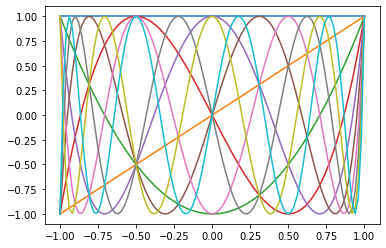

In [17]:
for i in range(10):
    pt.plot(mesh, np.cos(i*np.arccos(mesh)))

Chebyshev polynomials achieve similar good, but imperfect conditioning on a uniform grid (but perfect conditioning on a grid of Chebyshev nodes).

In [18]:
#keep
n = 20
xs = np.linspace(-1, 1, n)
V = np.array([
    np.cos(i*np.arccos(xs))
    for i in range(n)
]).T

la.cond(V)